# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [5]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key="a46ac64982fa415ebe391a716963d38e")

In [7]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", 
    language="en",
    sort_by="relevancy")

print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 8625


In [8]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)

print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 3104


In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text,date
0,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...,2021-11-05
1,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...,2021-10-28
2,0.0000,0.000,1.000,0.000,"For all the talk of democratizing finance, the...",2021-10-26
3,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t...",2021-11-12
4,0.0000,0.000,1.000,0.000,Representation of cryptocurrency Bitcoin is pl...,2021-10-21


In [10]:
ethereum_sentiment = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text,date
0,0.0000,0.0,1.000,0.000,A new cross-chain bridge is currently connecte...,2021-10-16
1,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t...",2021-11-12
2,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...,2021-11-05
3,0.5267,0.0,0.907,0.093,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01
4,0.4588,0.0,0.903,0.097,Cryptocurrency and business continuity line im...,2021-11-01


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.195520,0.003150,0.946600,0.050250
std,0.289429,0.014087,0.066127,0.067138
min,-0.273200,0.000000,0.801000,0.000000
25%,0.000000,0.000000,0.896500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.476700,0.000000,1.000000,0.103500
max,0.755800,0.063000,1.000000,0.199000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.0,20.000000,20.000000
mean,0.280475,0.0,0.936850,0.063150
std,0.308037,0.0,0.074661,0.074661
min,0.000000,0.0,0.779000,0.000000
25%,0.000000,0.0,0.902500,0.000000
50%,0.180600,0.0,0.964000,0.036000
75%,0.530600,0.0,1.000000,0.097500
max,0.822500,0.0,1.000000,0.221000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()


,compound,negative,neutral,positive,text,date,tokens
0,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...,2021-11-05,"[similar, hoax, earlier, year, tied, walmart, ..."
1,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...,2021-10-28,"[theres, big, new, presence, slurping, power, ..."
2,0.0000,0.000,1.000,0.000,"For all the talk of democratizing finance, the...",2021-10-26,"[talk, democratizing, finance, vast, majority,..."
3,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t...",2021-11-12,"[keeping, previous, announcement, amc, theater..."
4,0.0000,0.000,1.000,0.000,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,"[representation, cryptocurrency, bitcoin, plac..."


In [17]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,date,tokens
0,0.0000,0.0,1.000,0.000,A new cross-chain bridge is currently connecte...,2021-10-16,"[new, crosschain, bridge, currently, connected..."
1,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t...",2021-11-12,"[keeping, previous, announcement, amc, theater..."
2,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...,2021-11-05,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,0.5267,0.0,0.907,0.093,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,0.4588,0.0,0.903,0.097,Cryptocurrency and business continuity line im...,2021-11-01,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
btc_text = ' '.join(bitcoin_df.text)
btc_processed = tokenizer(btc_text)
btc_ngrams = Counter(ngrams(btc_processed, n=2))

In [20]:
# Generate the Ethereum N-grams where N=2
eth_text = ' '.join(ethereum_df.text)
eth_processed = tokenizer(eth_text)
eth_ngrams = Counter(ngrams(eth_processed, n=2))

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(btc_ngrams.most_common(10)))

{('reuters', 'bitcoin'): 6, ('illustration', 'taken'): 5, ('cryptocurrency', 'bitcoin'): 4, ('oct', 'reuters'): 4, ('bitcoin', 'seen'): 4, ('picture', 'illustration'): 4, ('char', 'bitcoin'): 4, ('char', 'representation'): 3, ('representation', 'virtual'): 3, ('virtual', 'cryptocurrency'): 3}


In [23]:
# Use token_count to get the top 10 words for Ethereum
print(dict(eth_ngrams.most_common(10)))

{('illustration', 'taken'): 4, ('taken', 'june'): 4, ('new', 'york'): 3, ('bitcoin', 'ethereum'): 3, ('ethereum', 'dogecoin'): 3, ('crosschain', 'bridge'): 2, ('ethereum', 'bitcoin'): 2, ('representations', 'cryptocurrencies'): 2, ('cryptocurrencies', 'bitcoin'): 2, ('dogecoin', 'ripple'): 2}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

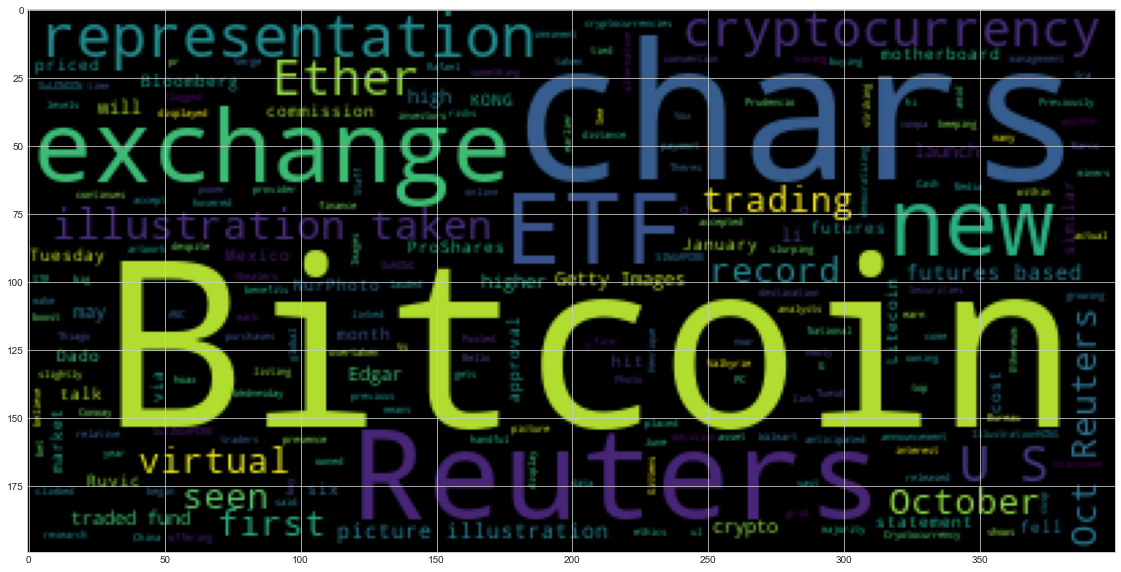

In [31]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_text)
plt.imshow(btc_wc);

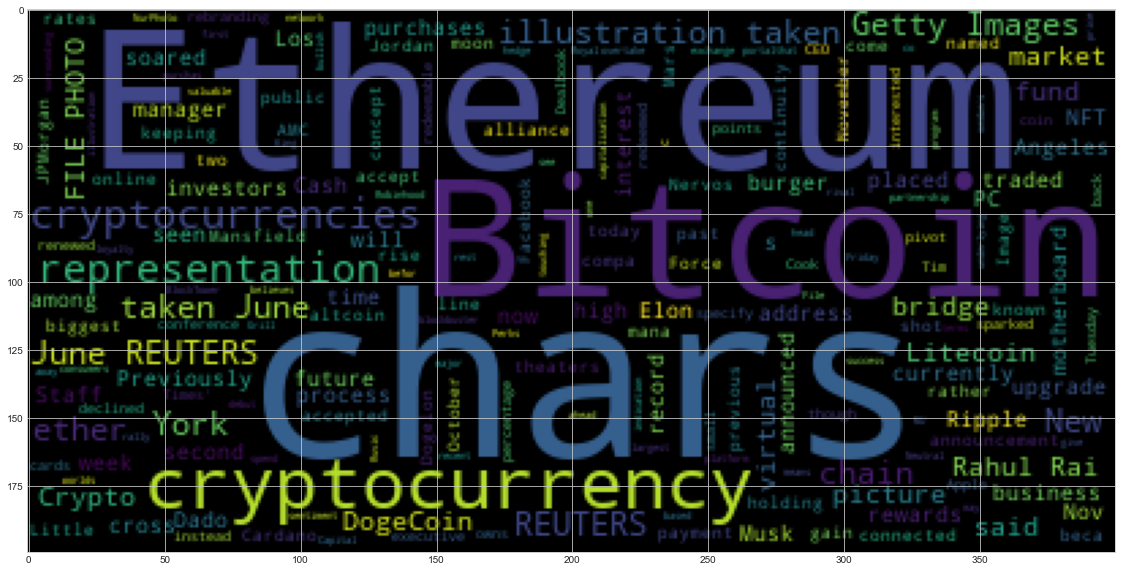

In [32]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_text)
plt.imshow(eth_wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [38]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(bitcoin_df.text)
btc_text

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars] Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars] For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dad

In [39]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [41]:
# Render the visualization
displacy.render(btc_doc, style="ent")

In [43]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'BTC'])

[]


---

### Ethereum NER

In [44]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(ethereum_df.text)
eth_text

'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars] Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars] Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin ma

In [45]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [46]:
# Render the visualization
displacy.render(eth_doc, style="ent")

In [47]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'BTC'])

[]


---